-------  0  ------


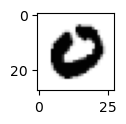

-------  7  ------


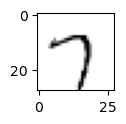

-------  4  ------


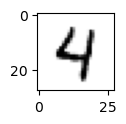

-------  0  ------


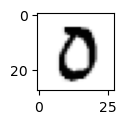

-------  1  ------


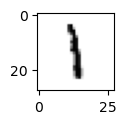

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28)
(10000, 28, 28)


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Model, load_model
from keras.utils import plot_model, to_categorical
from keras.datasets import mnist
from PIL import Image
import numpy as np

import os


(x_train, y_train), (x_test, y_test) = mnist.load_data()                  #load handwritten numbers and labels and make training/testing datasets
  
for i in range (25,30) :                                                  # plot 5 arbitary numbers 
 image_index = i
 print("-------  " + str(y_test[image_index]) + "  ------")
 fig2 = plt.figure(figsize=(1,1))
 plt.imshow(x_test[image_index], cmap='Greys')
 fig2.savefig("Digit"+str(i)+".png")
 plt.show()
  
print(x_train.shape)
print(x_test.shape)
  
img_rows, img_cols = 28, 28                                                 

#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)  # reshape data 
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)

x_train = x_train / 255.                          # scale range of training vars (RGB values can range from 0 to 255)
x_test = x_test / 255.
  
y_train_C = to_categorical(y_train, 10)        # convert labels to a binary class matrix
y_test_C = to_categorical(y_test, 10)


In [106]:
L1 = Input(shape=(28, 28,1))                   #define NN architecture
L2 = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols))(L1)
L3 = Conv2D(64, (3, 3), activation='relu')(L2)                                              
L4 = MaxPooling2D(pool_size=(2, 2))(L3)  
L5 = Dropout(0.25)(L4)
L6 = Flatten()(L5) 
L7 = Dense(128, activation='relu')(L6) 
L8 = Dropout(0.5)(L7)  
L9 = Dense(10, activation='softmax')(L8)
  
model = Model(inputs=L1, outputs=L9)             # Define input and output layer
  
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])   #  compile model - define loss function and loss minimizer
  
plot_model(model, to_file="NN_Ar.png", show_shapes=True)   # plot NN architecture

hist = model.fit(x_train, y_train_C, batch_size=128, epochs=1, verbose=1, validation_data=(x_test, y_test_C))    # Train the model - Define training/test data, epochs, batch size 
  
fig= plt.figure(figsize=(4,4))                               #plot training and test cuvres
plt.plot(hist.history['loss'],label='Train')
plt.plot(hist.history['val_loss'], label='Test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(loc='upper left')
fig.savefig("TC_cNN.png")
plt.show()
  
#model.save("test_model.h5")  

ValueError: Input 0 of layer "conv2d_15" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)

---


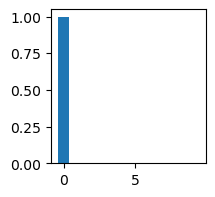

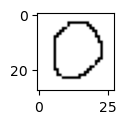

---


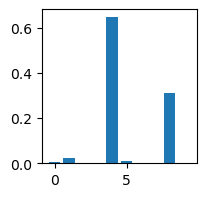

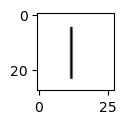

---


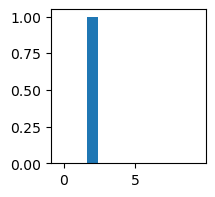

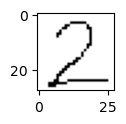

---


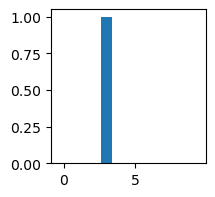

---


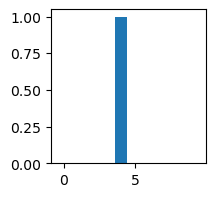

---


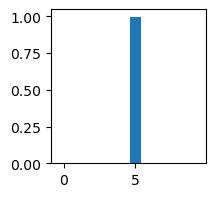

---


---


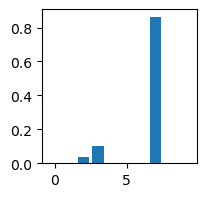

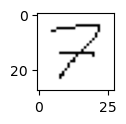

---


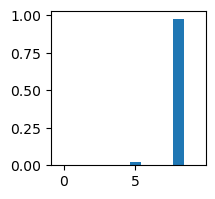

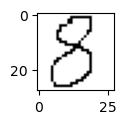

---


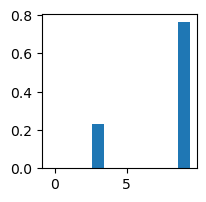

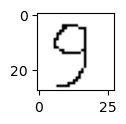

In [107]:
model = load_model("test_model.h5")

images=[]

for i in range (0,10):
 im = Image.open(str(i)+".bmp")
 images.append(np.array(im))

Data=np.array(images)

Data=255-Data

DataS = Data / 255

DataS = DataS.reshape(DataS.shape[0], 28, 28, 1)

score = model.predict(DataS, verbose=0)

I=[0,1,2,3,4,5,6,7,8,9]

for i in range (0,10):
 print ("---")
 #for j in range (0,10):
      # print ("Score for " + str(j) +" : " + str(score[i][j]))
 fig= plt.figure(figsize=(2,2))
 plt.bar(I, score[i])
 plt.show()
 fig2 = plt.figure(figsize=(1,1))
 plt.imshow(Data[i], cmap='Greys')
 plt.show()